# Midterm

### James Williams
### ADEC7430
### 11/3/2019

<a id= "TOC"></a>
 1. <a href= "#Setup">Setup the Enviorment </a>
 2. <a href= "#LoadData"> Load the Data </a>
 2. <a href= "#DataExpl"> Data Exploration </a>
 2. <a href= "Trans"> Transformations </a>
 2. <a href= "#Lasso"> Lasso Regression </a>
 2. <a href= "#RF"> Random Forrest Regression </a>
 2. <a href= "TestDataLoadPrep"> Test Data Load/Prep </a>
 2. <a href= "Test"> Test </a>
  

<a id= "Setup"></a> 
## **Set Up** <a href="#TOC">TOC</a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
projFld = "/Users/james/Documents/ADEC7430"
codeFld = os.path.join(projFld, "PyCode")
fnsFld = os.path.join(codeFld,"_Functions")
outputFld = os.path.join(projFld, "Output")
rawDataFld = os.path.join(projFld, "RawData")
savedDataFld = os.path.join(projFld, "SavedData")
os.path.exists(outputFld)

True

<a id= "LoadData"></a> 
## **Load The Data** <a href="#TOC">TOC</a>

In [3]:
raw_features_train_file = os.path.join(rawDataFld, "dengue_features_train.csv")
raw_labels_train_file = os.path.join(rawDataFld, "dengue_labels_train.csv")
features_raw_train = pd.read_csv(raw_features_train_file)
labels_raw_train = pd.read_csv(raw_labels_train_file)
features_raw_train['cases']=labels_raw_train["total_cases"]
full_train_data = pd.merge(features_raw_train, labels_raw_train, on = ["city", "year", "weekofyear"])
print(features_raw_train.shape)
print(labels_raw_train.shape)

(1160, 25)
(1160, 4)


<a id= "DataExpl"></a> 
## **Data Exploration** <a href="#TOC">TOC</a>

Lets just focus on the features df because we have added cases to it. 

In [4]:
pd.set_option('display.width',100)
pd.set_option('max_colwidth',100)
pd.set_option('display.max_columns',100)
print(features_raw_train.dtypes)

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [10]:
features_raw_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
city,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj
year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990
weekofyear,18,19,20,21,22,23,24,25,26,27
week_start_date,4/30/90,5/7/90,5/14/90,5/21/90,5/28/90,6/4/90,6/11/90,6/18/90,6/25/90,7/2/90
ndvi_ne,0.1226,0.1699,0.03225,0.128633,0.1962,NaN,0.1129,0.0725,0.10245,NaN
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.2622,0.17485,0.0928,0.0725,0.146175,0.12155
ndvi_se,0.198483,0.162357,0.1572,0.227557,0.2512,0.254314,0.205071,0.151471,0.125571,0.160683
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.24734,0.181743,0.210271,0.133029,0.1236,0.202567
precipitation_amt_mm,12.42,22.82,34.54,15.36,7.52,9.58,3.48,151.12,19.32,14.41
reanalysis_air_temp_k,297.573,298.211,298.781,298.987,299.519,299.63,299.207,299.591,299.579,300.154


In [11]:
features_raw_train.tail(10).T

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159
city,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq
year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
weekofyear,13,14,15,16,17,18,19,20,21,22
week_start_date,3/25/08,4/1/08,4/8/08,4/15/08,4/22/08,4/29/08,5/6/08,5/13/08,5/20/08,5/27/08
ndvi_ne,0.3366,0.270083,0.284357,0.302614,0.2706,0.0617286,0.136157,0.196386,0.221017,0.12245
ndvi_nw,0.304214,0.190271,0.353671,0.244671,0.371314,0.1339,0.163157,0.29632,0.235317,0.1571
ndvi_se,0.3229,0.190657,0.321786,0.296314,0.344229,0.0947143,0.139157,0.264157,0.180443,0.086
ndvi_sw,0.377314,0.215157,0.302829,0.328757,0.283071,0.117843,0.134557,0.225586,0.199471,0.103314
precipitation_amt_mm,62.13,107,71.45,79.74,42.05,42.12,50.5,30.08,45.69,72.04
reanalysis_air_temp_k,297.094,297.694,297.537,297.447,296.76,298.073,295.976,294.85,296.269,296.741


We can see that the data is seperated by city, with the respective values for San Juan at the beginning of each data set, followed but the data for Iquitos at the end of the data set. When it comes time for modeling, there is a possibility to control for the city by encoding a dummy variable, however it may be best to split the data by city and conducting modeling that way. Further exploration is needed. The next steps will be to look at some visualizations. We will: 
    
    *Check the distribution of the target (cases). 
    *Look at lm plots for each variable and the target.
    *Look at lm plots for the target and the variables over time.
    *Correlation plots. 
    

This is problematic, it has dramatic positive skew, with many values of 0. Many outliers seem to be in this data as well. Lets add a vector with a log transform, and add .0001 to every case so we can transform the zeros. 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

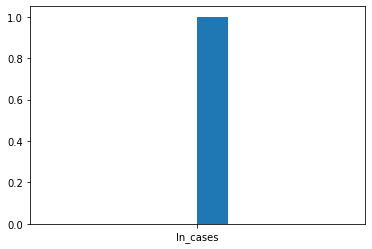

In [5]:
features_raw_train['ln_cases'] = features_raw_train.cases.apply(lambda x: np.log(x + 0.0001))
plt.hist('ln_cases')

(array([1000.,  113.,   16.,   11.,    5.,    3.,    2.,    5.,    3.,
           2.]),
 array([  0. ,  46.1,  92.2, 138.3, 184.4, 230.5, 276.6, 322.7, 368.8,
        414.9, 461. ]),
 <a list of 10 Patch objects>)

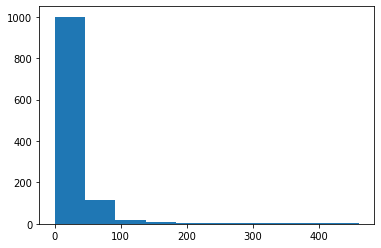

In [6]:
frt= features_raw_train.copy()
plt.hist(features_raw_train['cases'])

Not great but clearly better

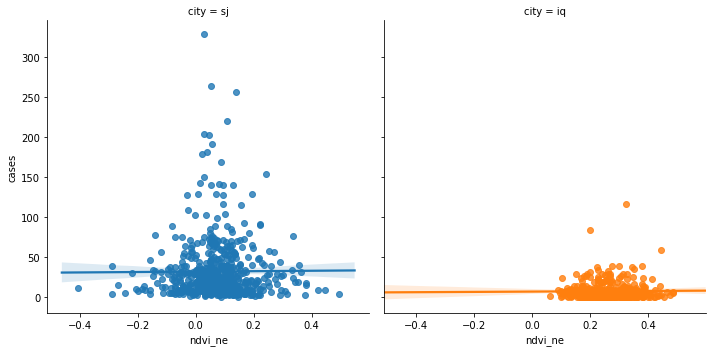

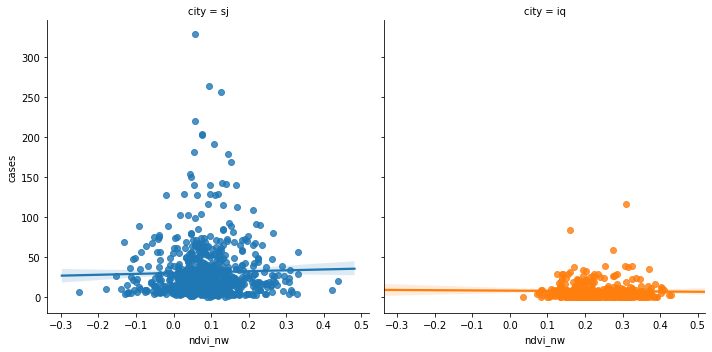

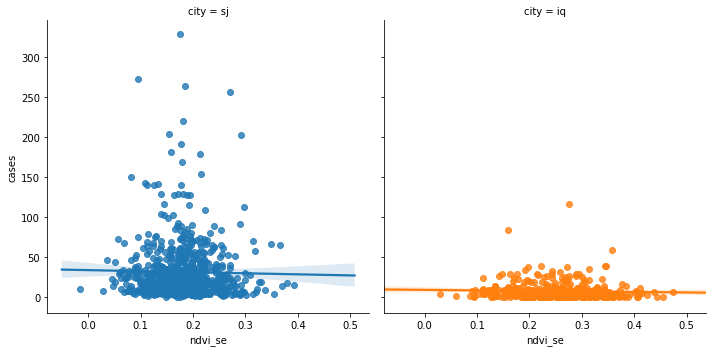

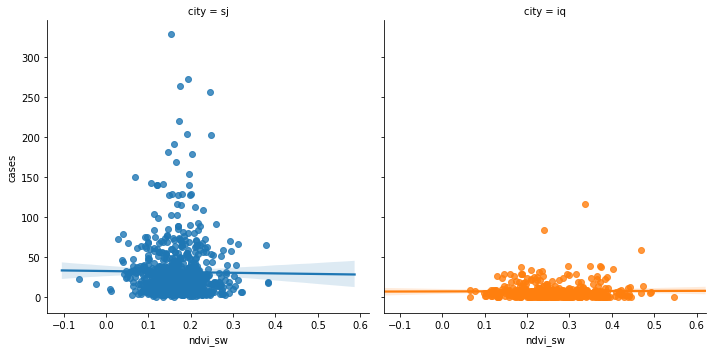

In [28]:
g=sns.lmplot(x='ndvi_ne', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_nw', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_se', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_sw', y='cases', data=features_raw_train, markers='o', col='city', hue='city')

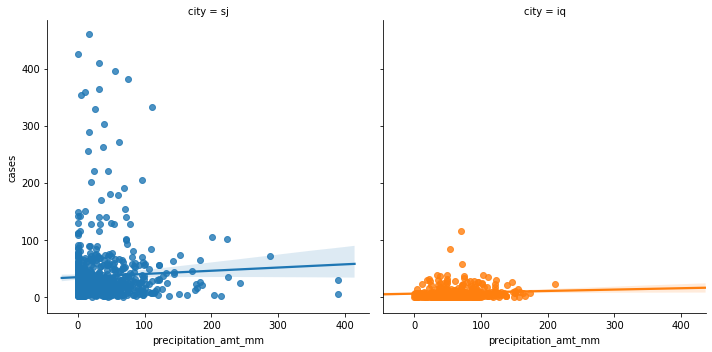

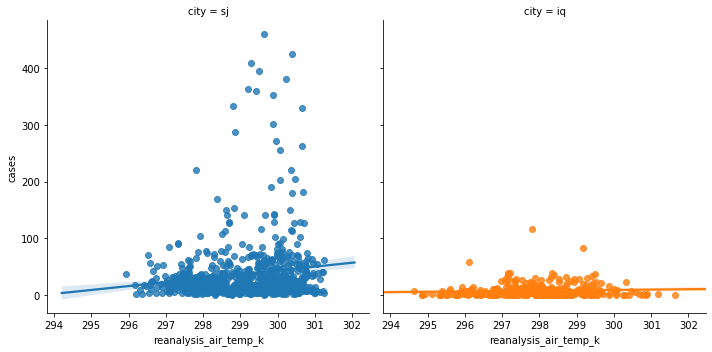

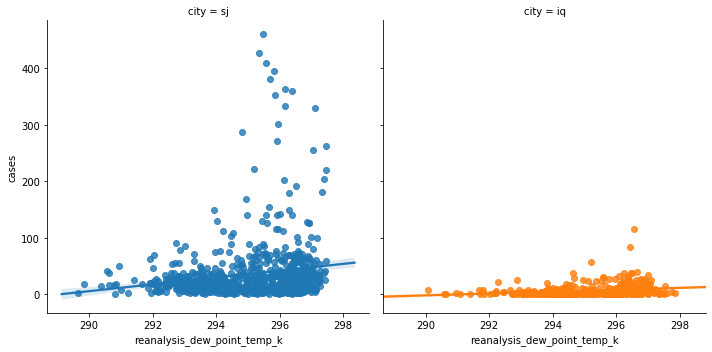

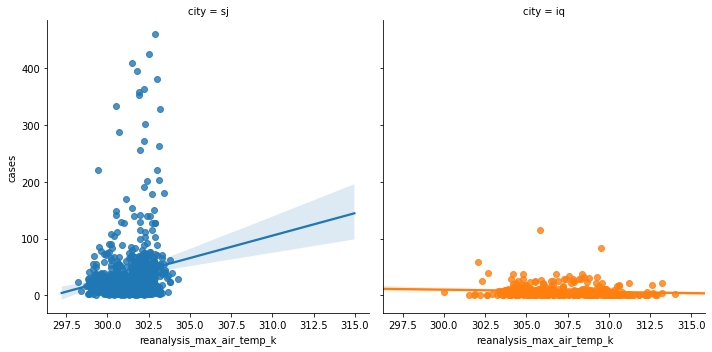

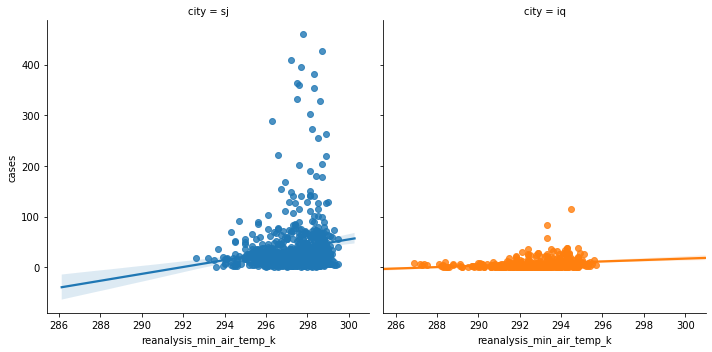

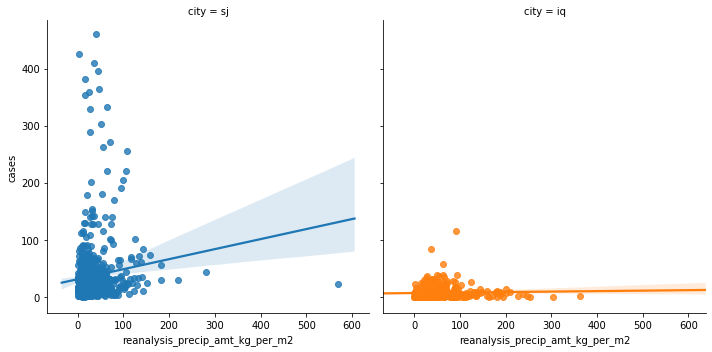

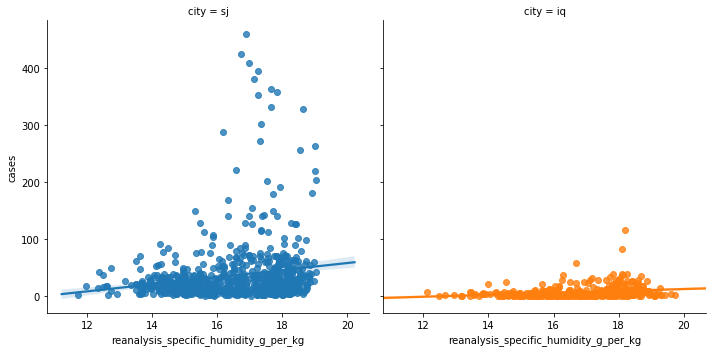

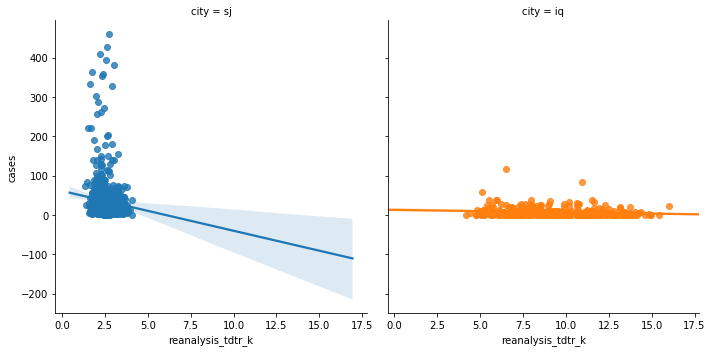

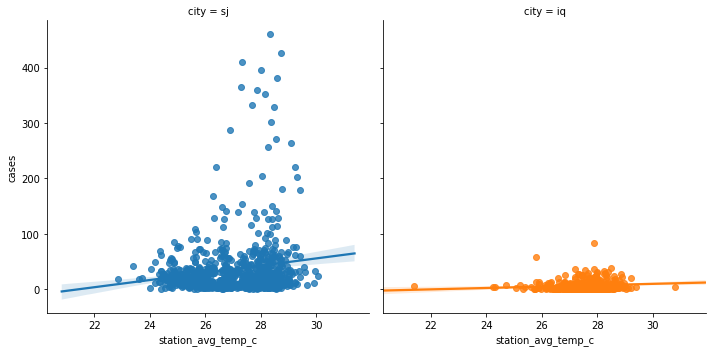

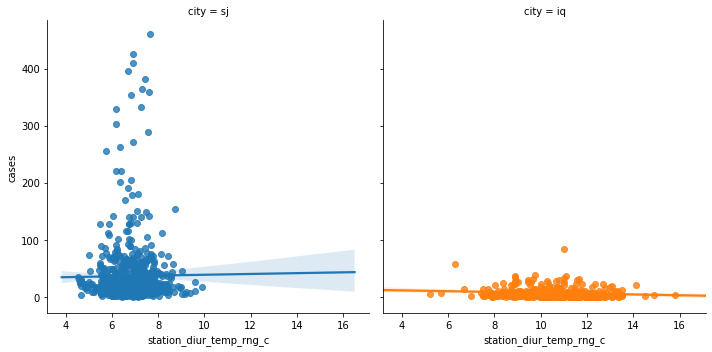

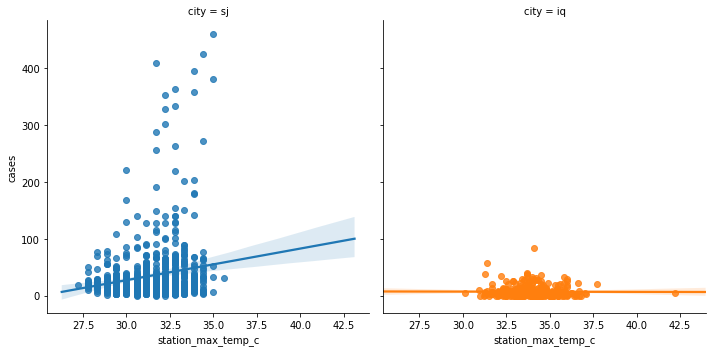

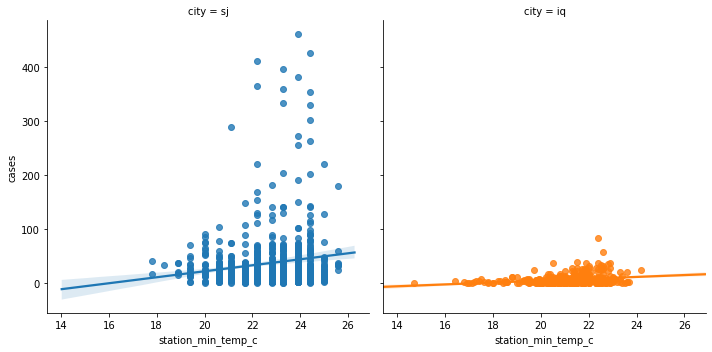

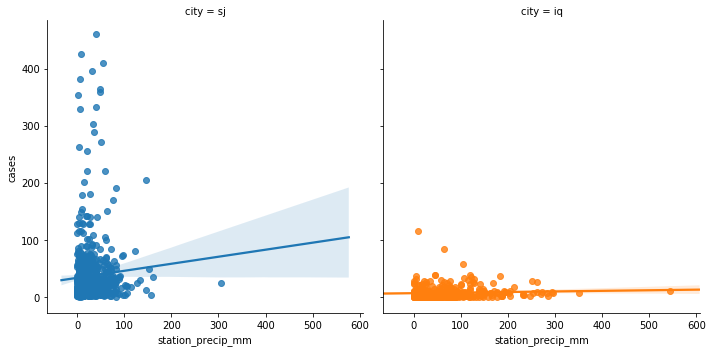

In [29]:
g=sns.lmplot(x='precipitation_amt_mm', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_air_temp_k', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_dew_point_temp_k', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_max_air_temp_k', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_min_air_temp_k', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_precip_amt_kg_per_m2', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_specific_humidity_g_per_kg', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_tdtr_k', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_avg_temp_c', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_diur_temp_rng_c', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_max_temp_c', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_min_temp_c', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_precip_mm', y='cases', data=features_raw_train, markers='o', col='city', hue='city')

Not a ton of correlation going on here. Clearly many outliers in the San Juan cases. Lets check of the log transformation makes these look a bit better.

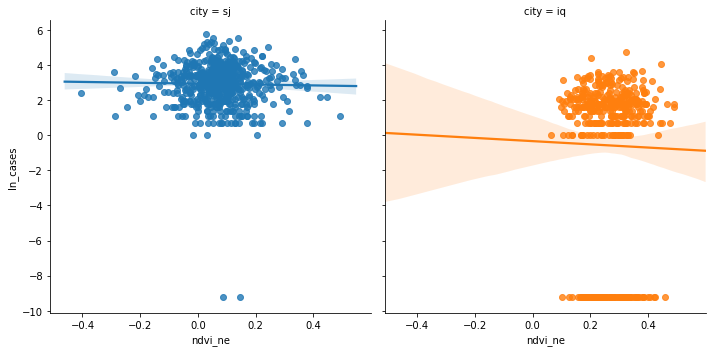

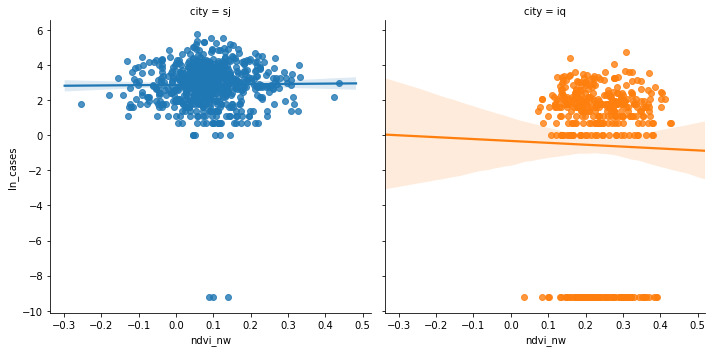

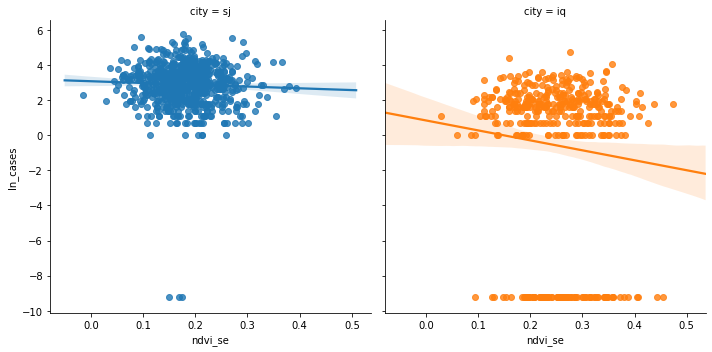

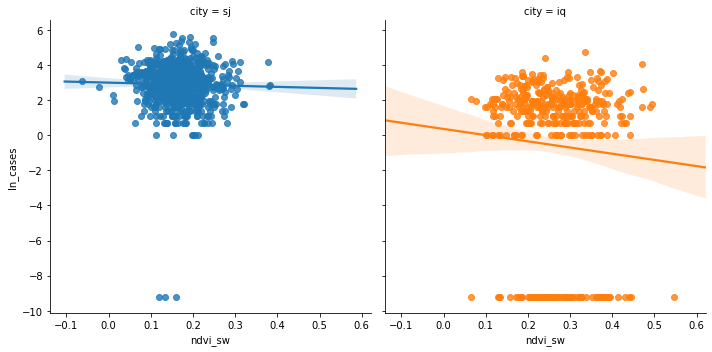

In [36]:
g=sns.lmplot(x='ndvi_ne', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_nw', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_se', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='ndvi_sw', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')

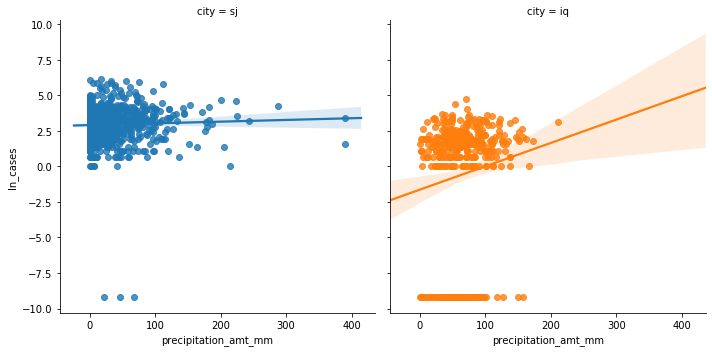

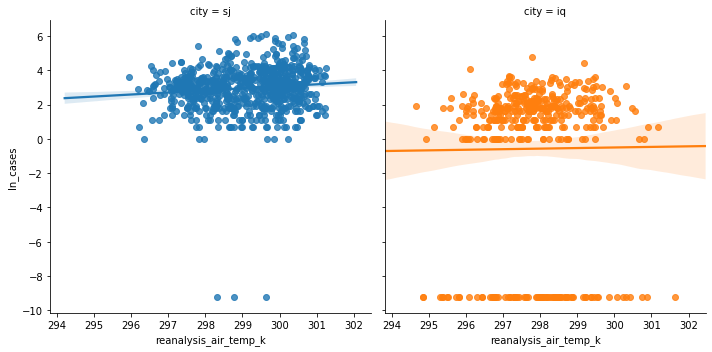

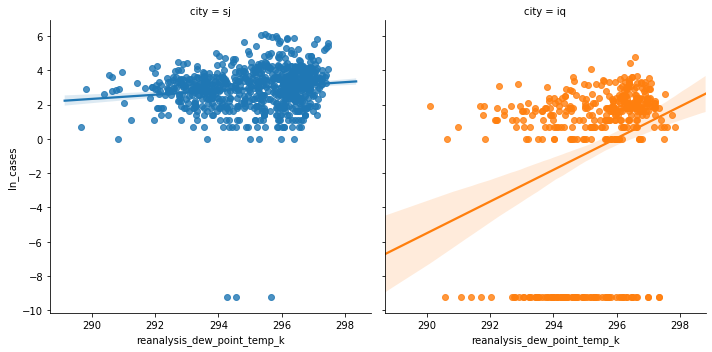

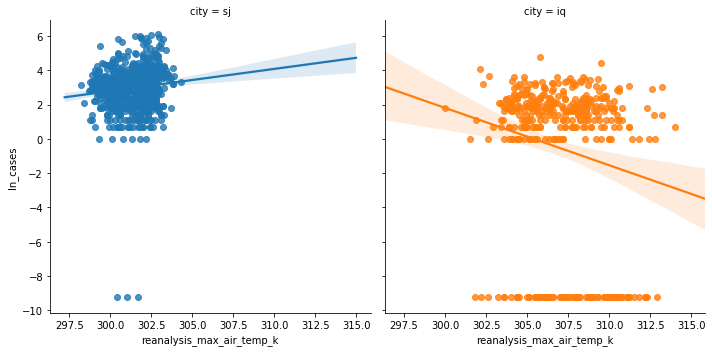

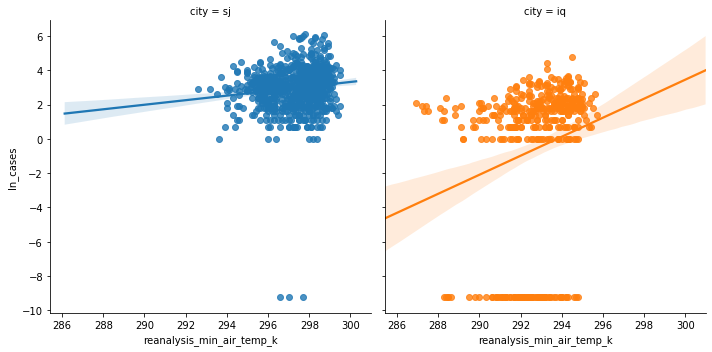

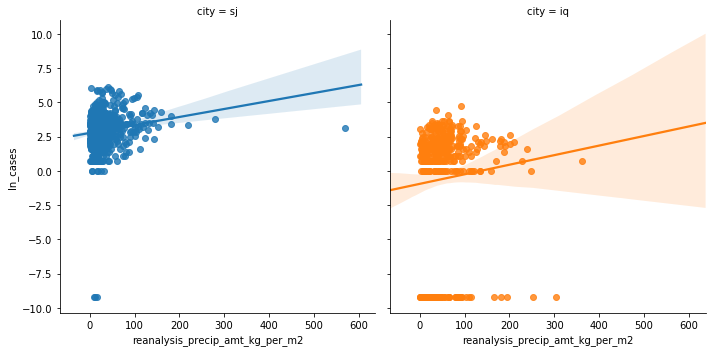

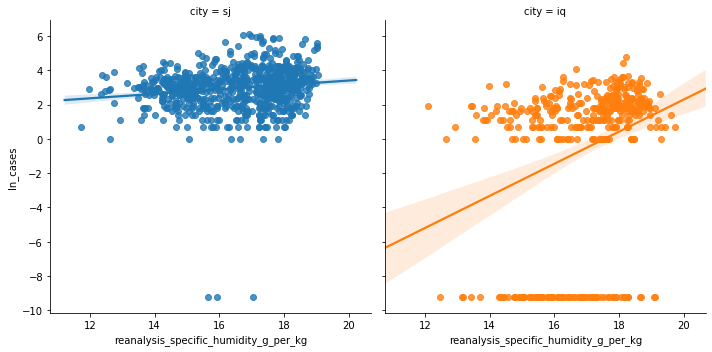

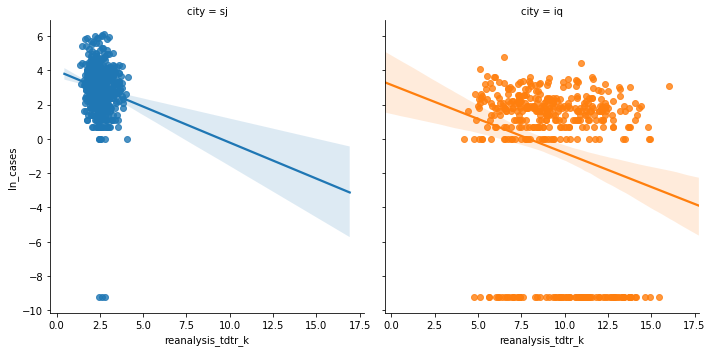

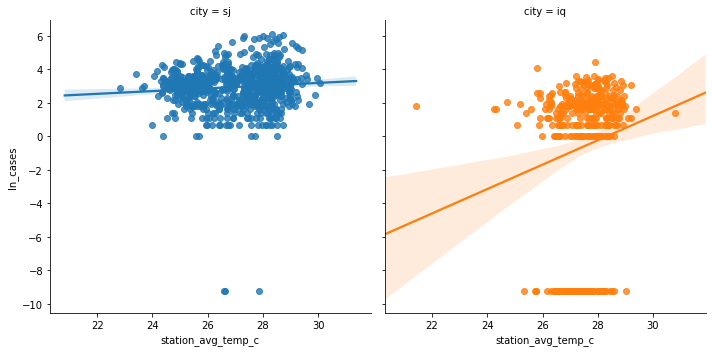

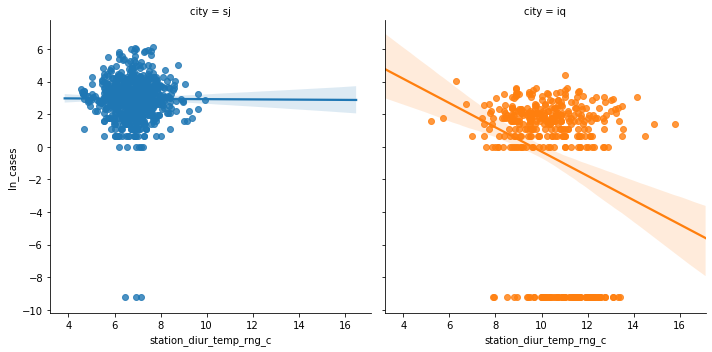

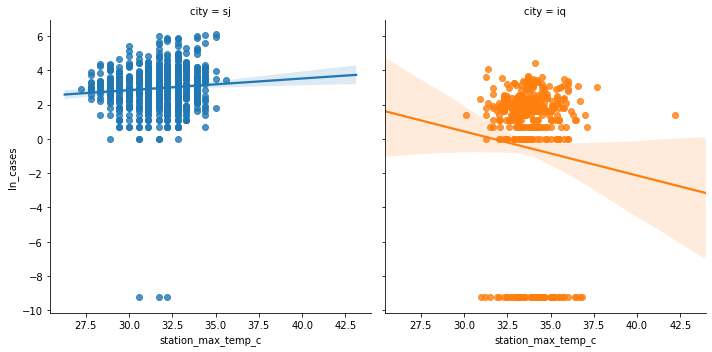

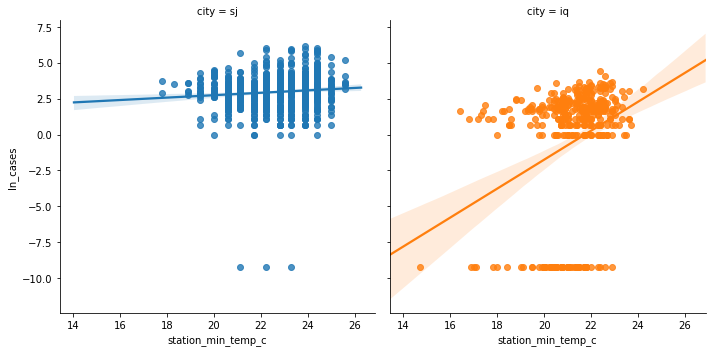

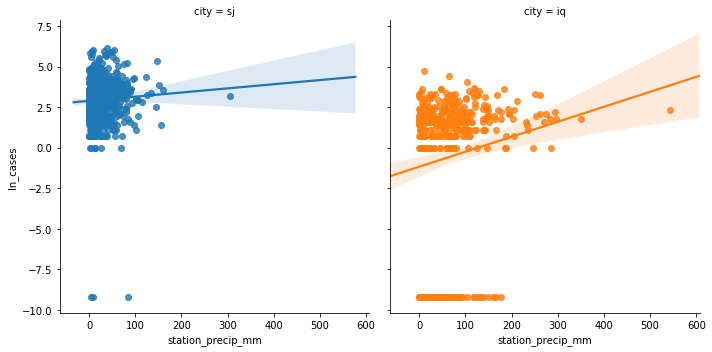

In [37]:
g=sns.lmplot(x='precipitation_amt_mm', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_air_temp_k', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_dew_point_temp_k', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_max_air_temp_k', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_min_air_temp_k', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_precip_amt_kg_per_m2', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_specific_humidity_g_per_kg', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='reanalysis_tdtr_k', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_avg_temp_c', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_diur_temp_rng_c', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_max_temp_c', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_min_temp_c', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='station_precip_mm', y='ln_cases', data=features_raw_train, markers='o', col='city', hue='city')

It seems safe to say that for SJ it helps, and for IQ it makes it much worse. We should explore how cases look over time. Lets check how year and week of year look. 

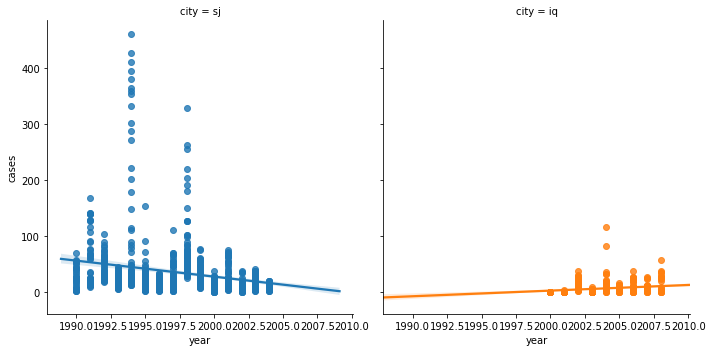

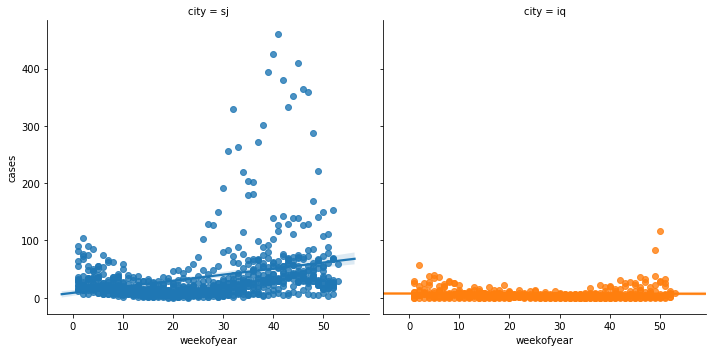

In [38]:
g=sns.lmplot(x='year', y='cases', data=features_raw_train, markers='o', col='city', hue='city')
g=sns.lmplot(x='weekofyear', y='cases', data=features_raw_train, markers='o', col='city', hue='city')

In all cases it seems to correlate. We should probably incorporate time into our models somehow. We will explore what to do about this in the Transformation section. Lets try look at some correlation heat plots and some actual correlation values. 

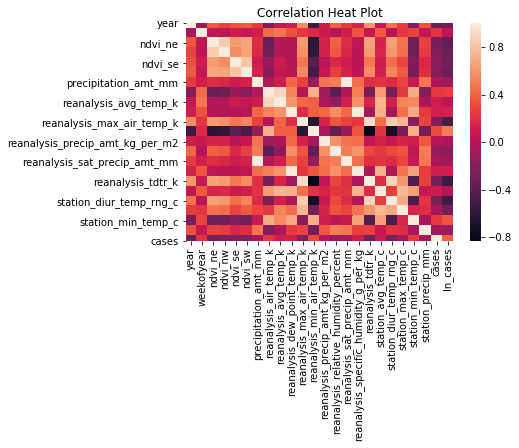

In [39]:
frt_corr= frt.corr()
sns.heatmap(frt_corr)
plt.title('Correlation Heat Plot')
plt.show()

This is a little messy and not easy to read, also it doesn't take into account the different cities siince they are objects. Lets split the df by city and repeat

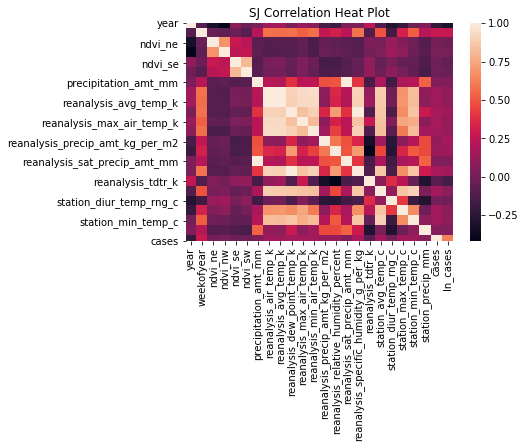

In [6]:
df_sj = features_raw_train[features_raw_train['city'] == 'sj']
df_iq = features_raw_train[features_raw_train['city'] == 'iq']
sj_corr= df_sj.corr()
sns.heatmap(sj_corr)
plt.title('SJ Correlation Heat Plot')
plt.show()

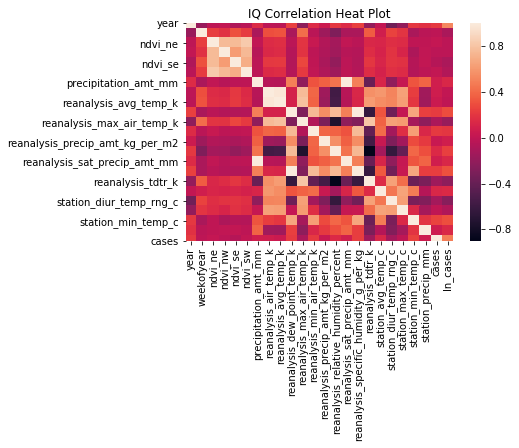

In [43]:
iq_corr= df_iq.corr()
sns.heatmap(iq_corr)
plt.title('IQ Correlation Heat Plot')
plt.show()

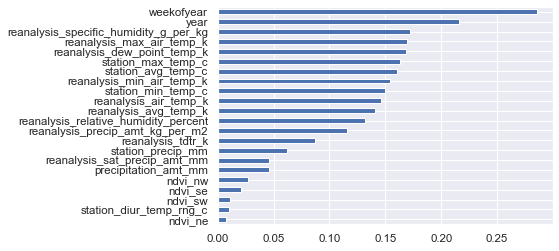

In [45]:
sns.set(font_scale = 1.05)
(abs(sj_corr)
 .cases
 .drop({'cases','ln_cases'})
 .sort_values()
 .plot
 .barh())

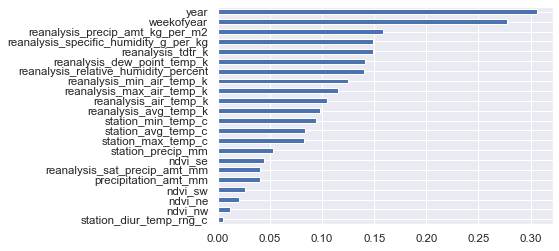

In [46]:
sns.set(font_scale = 1.05)
(abs(sj_corr)
 .ln_cases
 .drop({'cases','ln_cases'})
 .sort_values()
 .plot
 .barh())

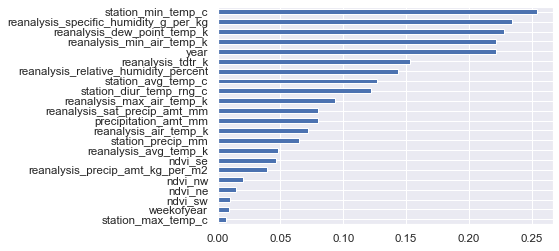

In [47]:
sns.set(font_scale = 1.05)
(abs(iq_corr)
 .cases
 .drop({'cases','ln_cases'})
 .sort_values()
 .plot
 .barh())

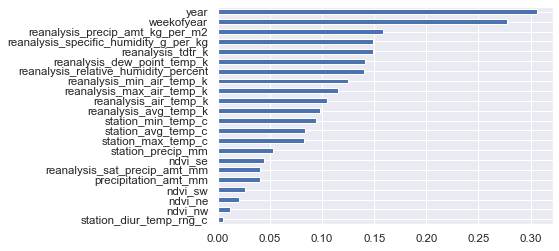

In [49]:
sns.set(font_scale = 1.05)
(abs(sj_corr)
 .ln_cases
 .drop({'cases','ln_cases'})
 .sort_values()
 .plot
 .barh())

Generally there is no difference between any of the correlation levels between the two cities with respect two cases and ln_cases. The exception is in IQ where it increase the correlation with time by a lot. Now lets take a look at:

    *Descriptive Stats
    *Missing values
    *Differences in Time between the two cities
    

In [50]:
frt.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1160.0,1999.484483,4.916886,1990.000000,1995.000000,2000.000000,2003.000000,2008.000000
weekofyear,1160.0,26.504310,14.915811,1.000000,14.000000,27.000000,39.000000,53.000000
ndvi_ne,1002.0,0.152141,0.134878,-0.406250,0.056800,0.139557,0.254004,0.493400
ndvi_nw,1116.0,0.140438,0.110957,-0.252800,0.064458,0.131075,0.217682,0.437100
ndvi_se,1140.0,0.205757,0.072717,-0.015533,0.158229,0.196757,0.251150,0.473400
ndvi_sw,1140.0,0.203704,0.082504,-0.063457,0.148202,0.190757,0.247007,0.546017
precipitation_amt_mm,1150.0,45.439513,44.134662,0.000000,9.447500,37.855000,70.000000,390.600000
reanalysis_air_temp_k,1153.0,298.637634,1.317818,294.635714,297.634286,298.584286,299.781429,301.637143
reanalysis_avg_temp_k,1153.0,299.160637,1.227631,294.892857,298.221429,299.235714,300.121429,302.928571
reanalysis_dew_point_temp_k,1153.0,295.183955,1.516485,289.642857,294.052857,295.568571,296.397143,297.852857


Looks like there could be some misisng values. Lets be thorough and double check

In [51]:
pd.isnull(features_raw_train).astype(int).aggregate(sum).to_dict() 

{'city': 0,
 'year': 0,
 'weekofyear': 0,
 'week_start_date': 0,
 'ndvi_ne': 158,
 'ndvi_nw': 44,
 'ndvi_se': 20,
 'ndvi_sw': 20,
 'precipitation_amt_mm': 10,
 'reanalysis_air_temp_k': 7,
 'reanalysis_avg_temp_k': 7,
 'reanalysis_dew_point_temp_k': 7,
 'reanalysis_max_air_temp_k': 7,
 'reanalysis_min_air_temp_k': 7,
 'reanalysis_precip_amt_kg_per_m2': 7,
 'reanalysis_relative_humidity_percent': 7,
 'reanalysis_sat_precip_amt_mm': 10,
 'reanalysis_specific_humidity_g_per_kg': 7,
 'reanalysis_tdtr_k': 7,
 'station_avg_temp_c': 33,
 'station_diur_temp_rng_c': 33,
 'station_max_temp_c': 11,
 'station_min_temp_c': 11,
 'station_precip_mm': 15,
 'cases': 0,
 'ln_cases': 0}

There are not too many. Any differences in the time index between the cities will determine how we handle these.

In [55]:
df_sj.describe().T

,count,mean,std,min,25%,50%,75%,max
year,748.0,1997.018717,4.170358,1990.000000,1993.000000,1997.000000,2001.000000,2004.000000
weekofyear,748.0,26.529412,14.851805,1.000000,14.000000,27.000000,39.000000,53.000000
ndvi_ne,592.0,0.072725,0.104101,-0.406250,0.021375,0.072700,0.121263,0.493400
ndvi_nw,706.0,0.084425,0.086802,-0.252800,0.037125,0.078650,0.129865,0.437100
ndvi_se,730.0,0.180398,0.056584,-0.015533,0.143886,0.179483,0.213525,0.393129
ndvi_sw,730.0,0.168657,0.055791,-0.063457,0.133825,0.168871,0.204404,0.381420
precipitation_amt_mm,740.0,34.767095,44.836376,0.000000,0.000000,20.395000,49.917500,390.600000
reanalysis_air_temp_k,743.0,299.073449,1.177103,295.938571,298.128571,299.227143,300.032857,301.255714
reanalysis_avg_temp_k,743.0,299.184618,1.156405,296.114286,298.239286,299.350000,300.128571,301.407143
reanalysis_dew_point_temp_k,743.0,295.097281,1.543092,289.642857,293.887143,295.438571,296.385000,297.467143


In [56]:
df_iq.describe().T

,count,mean,std,min,25%,50%,75%,max
year,412.0,2003.961165,2.325872,2000.000000,2002.000000,2004.000000,2006.000000,2008.000000
weekofyear,412.0,26.458738,15.049335,1.000000,13.000000,27.000000,39.250000,53.000000
ndvi_ne,410.0,0.266810,0.080958,0.061729,0.203239,0.267986,0.323002,0.488400
ndvi_nw,410.0,0.236890,0.076382,0.035860,0.179317,0.230942,0.294111,0.428771
ndvi_se,410.0,0.250907,0.076338,0.029880,0.194745,0.250700,0.305689,0.473400
ndvi_sw,410.0,0.266104,0.085513,0.064183,0.204654,0.262350,0.325348,0.546017
precipitation_amt_mm,410.0,64.701927,35.521804,0.000000,39.182500,60.565000,86.602500,210.830000
reanalysis_air_temp_k,410.0,297.847850,1.186370,294.635714,297.063214,297.815714,298.566429,301.637143
reanalysis_avg_temp_k,410.0,299.117178,1.347547,294.892857,298.210714,299.110714,300.098214,302.928571
reanalysis_dew_point_temp_k,410.0,295.341024,1.455777,290.088571,294.364643,295.753571,296.452857,297.852857


We can see that the cities are viewed in two different periods of time, SJ begginning in 1990 and ending in 2004, and IQ from 200-2008. This is problematic and is further evidence we should model by city individually. In 0rder to make this data tidier based on these facts, lets create a week index for each city

In [7]:
frt = frt.sort_values(['city', 'year', 'weekofyear'])
frt['week_num'] = [i for i in range(frt.shape[0])]
frt[['week_num','city']].head(10)
frt.loc[frt.city=='sj'][['week_num','city']].head()

,week_num,city
0,412,sj
1,413,sj
2,414,sj
3,415,sj
4,416,sj


In [8]:
min_recs = frt.groupby('city').agg({'week_num':'min'}).reset_index()
min_recs.rename(columns={'week_num':'min_week_num'}, inplace = True)
frt2 = pd.merge(frt, min_recs, on='city', how='left')
frt2.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,ln_cases,week_num,min_week_num
0,iq,2000,26,7/1/00,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.4,10.775000,32.5,20.7,3.0,0,-9.21034,0,0
1,iq,2000,27,7/8/00,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.9,11.566667,34.0,20.8,55.6,0,-9.21034,1,0


In [9]:
frt2['week_num'] = frt2['week_num'] - frt2['min_week_num']
frt2.drop(columns={'min_week_num'})
frt = frt2.copy()
del frt2
frt.groupby('city').agg({'week_num':'min'}).reset_index()

,city,week_num
0,iq,0
1,sj,0


Now our cities have two different indexs, with respect to the city, and they are ordered by the week observed in a respective city.

In [11]:
frt.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,ln_cases,week_num,min_week_num
0,iq,2000,26,7/1/00,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.4,10.775000,32.5,20.7,3.0,0,-9.21034,0,0
1,iq,2000,27,7/8/00,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.9,11.566667,34.0,20.8,55.6,0,-9.21034,1,0


In [12]:
frt.drop(columns= 'min_week_num')

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,ln_cases,week_num
0,iq,2000,26,7/1/00,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,-9.210340,0
1,iq,2000,27,7/8/00,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,-9.210340,1
2,iq,2000,28,7/15/00,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,-9.210340,2
3,iq,2000,29,7/22/00,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,-9.210340,3
4,iq,2000,30,7/29/00,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,-9.210340,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,sj,2004,33,8/12/04,0.037400,0.108400,0.125300,0.177414,20.92,300.995714,301.200000,296.400000,302.9,299.2,14.10,76.171429,20.92,17.818571,2.657143,28.942857,7.228571,33.9,24.4,10.5,14,2.639064,743
1156,sj,2004,34,8/19/04,-0.016400,-0.021875,0.181600,0.170600,37.30,300.794286,300.850000,297.268571,302.6,298.6,44.40,81.264286,37.30,18.774286,2.585714,29.000000,6.314286,32.2,24.4,28.3,14,2.639064,744
1157,sj,2004,35,8/26/04,0.099600,0.063300,0.100657,0.109429,20.30,300.912857,301.050000,297.054286,302.6,298.7,13.50,79.684286,20.30,18.531429,2.642857,29.057143,6.485714,33.3,25.0,20.6,7,1.945924,745
1158,sj,2004,36,9/2/04,0.041400,0.049800,0.163129,0.199200,62.61,300.861429,300.900000,296.390000,302.6,298.9,25.37,76.711429,62.61,17.822857,2.628571,28.614286,7.057143,32.8,24.4,23.8,14,2.639064,746


In [8]:
frt1=frt.copy()
frt2=frt.copy()
frt3=frt.copy()
frt4=frt.copy()

<a id= "Trans"></a> 
## **Transformations** <a href="#TOC">TOC</a>

Lets replace NAs with the median

In [9]:
tlist = frt.groupby('city').agg('median').reset_index().to_dict('records')
# this is a list of two dictionaries
tdict = {'sj': tlist[1], 'iq': tlist[0]}

for tvar in frt2.columns:
    print(tvar)
    if tvar in ['week_start_date']:
        pass
    else:
        tfilt_iq = pd.isnull(frt[tvar]) & (frt['city']=='iq')
        print('tfilt_iq=',sum(tfilt_iq))
        frt.loc[tfilt_iq, tvar] = tdict['iq'][tvar]
        tfilt_sj = pd.isnull(frt[tvar]) & (frt['city']=='sj')
        print('tfilt_sj=',sum(tfilt_sj))
        frt.loc[tfilt_sj, tvar] = tdict['sj'][tvar]

city
tfilt_iq= 0
tfilt_sj= 0
year
tfilt_iq= 0
tfilt_sj= 0
weekofyear
tfilt_iq= 0
tfilt_sj= 0
week_start_date
ndvi_ne
tfilt_iq= 2
tfilt_sj= 156
ndvi_nw
tfilt_iq= 2
tfilt_sj= 42
ndvi_se
tfilt_iq= 2
tfilt_sj= 18
ndvi_sw
tfilt_iq= 2
tfilt_sj= 18
precipitation_amt_mm
tfilt_iq= 2
tfilt_sj= 8
reanalysis_air_temp_k
tfilt_iq= 2
tfilt_sj= 5
reanalysis_avg_temp_k
tfilt_iq= 2
tfilt_sj= 5
reanalysis_dew_point_temp_k
tfilt_iq= 2
tfilt_sj= 5
reanalysis_max_air_temp_k
tfilt_iq= 2
tfilt_sj= 5
reanalysis_min_air_temp_k
tfilt_iq= 2
tfilt_sj= 5
reanalysis_precip_amt_kg_per_m2
tfilt_iq= 2
tfilt_sj= 5
reanalysis_relative_humidity_percent
tfilt_iq= 2
tfilt_sj= 5
reanalysis_sat_precip_amt_mm
tfilt_iq= 2
tfilt_sj= 8
reanalysis_specific_humidity_g_per_kg
tfilt_iq= 2
tfilt_sj= 5
reanalysis_tdtr_k
tfilt_iq= 2
tfilt_sj= 5
station_avg_temp_c
tfilt_iq= 28
tfilt_sj= 5
station_diur_temp_rng_c
tfilt_iq= 28
tfilt_sj= 5
station_max_temp_c
tfilt_iq= 6
tfilt_sj= 5
station_min_temp_c
tfilt_iq= 6
tfilt_sj= 5
station_precip_m

In [13]:
pd.isnull(frt).astype(int).aggregate(sum).to_dict() 

{'city': 0,
 'year': 0,
 'weekofyear': 0,
 'week_start_date': 0,
 'ndvi_ne': 0,
 'ndvi_nw': 0,
 'ndvi_se': 0,
 'ndvi_sw': 0,
 'precipitation_amt_mm': 0,
 'reanalysis_air_temp_k': 0,
 'reanalysis_avg_temp_k': 0,
 'reanalysis_dew_point_temp_k': 0,
 'reanalysis_max_air_temp_k': 0,
 'reanalysis_min_air_temp_k': 0,
 'reanalysis_precip_amt_kg_per_m2': 0,
 'reanalysis_relative_humidity_percent': 0,
 'reanalysis_sat_precip_amt_mm': 0,
 'reanalysis_specific_humidity_g_per_kg': 0,
 'reanalysis_tdtr_k': 0,
 'station_avg_temp_c': 0,
 'station_diur_temp_rng_c': 0,
 'station_max_temp_c': 0,
 'station_min_temp_c': 0,
 'station_precip_mm': 0,
 'cases': 0,
 'week_num': 0,
 'min_week_num': 0}

Lets define a function to create lags by weeks to incorporate time without making this a time series problem. We will do lags for a month (4 weeks). The logice behind this is that the # of cases in week Z will be directly a function of the weather that accoured G weeks ago. First we need to buid an index by week number, so each city starts at 0.

In [15]:
frt['week_num'] = [i for i in range(frt.shape[0])]
frt[['week_num','city']].head(10)
frt.loc[frt.city=='sj'][['week_num','city']].head()

# find the first week_num of the second city
min_recs = frt.groupby('city').agg({'week_num':'min'}).reset_index()
min_recs.rename(columns={'week_num':'min_week_num'}, inplace = True)
frt5 = pd.merge(frt, min_recs, on='city', how='left')
frt5.head(2)

frt5['week_num'] = frt5['week_num'] - frt5['min_week_num']
frt5.drop(columns={'min_week_num'})
frt = frt5.copy()
del frt5

#check
frt.groupby('city').agg({'week_num':'min'}).reset_index()

,city,week_num
0,iq,0
1,sj,0


In [16]:
def lag_variable(
        inputdf
        , varname  = None
        , lagsize  = None
        , groupvar = 'city'
        , ordervar = 'week_num'
        ):
    tdf = inputdf[[groupvar, ordervar, varname]].copy()
    tdf.head()
    tdf[ordervar] = tdf[ordervar] + lagsize
    varname_new = varname+'_l' + str(lagsize)
    tdf.rename(columns = {varname: varname_new}, inplace = True)
    inputdf_new = pd.merge(inputdf, tdf, on=[groupvar, ordervar], how='left')
    return(inputdf_new) 

Lets test.

In [17]:
tdf1 = lag_variable(
        frt
        , varname  = 'station_max_temp_c'
        , lagsize  = 2
        , groupvar = 'city'
        , ordervar = 'week_num'
        )

tdf1.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,ln_cases,week_num,min_week_num,station_max_temp_c_l2
0,sj,1990.0,18.0,4/30/90,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,1.386319,0,0,NaN
1,sj,1990.0,19.0,5/7/90,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,1.609458,1,0,NaN


In [18]:
condition_vars = frt.columns
# drop a few non-lagging ones
condition_vars = [i for i in condition_vars if i not in 
                  ['city','year', 'week_num',
                   'weekofyear','week_start_date']]

In [19]:
for i in range(1,5):
    print(i)
    
for tvar in condition_vars:
    print(tvar)
    frt1mo = lag_variable(frt, varname = tvar, lagsize = i)
    frt = frt1mo.copy()


1
2
3
4
ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm
cases
ln_cases
min_week_num


In [19]:
frt.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,week_num,min_week_num,ndvi_ne_l4,ndvi_nw_l4,ndvi_se_l4,ndvi_sw_l4,precipitation_amt_mm_l4,reanalysis_air_temp_k_l4,reanalysis_avg_temp_k_l4,reanalysis_dew_point_temp_k_l4,reanalysis_max_air_temp_k_l4,reanalysis_min_air_temp_k_l4,reanalysis_precip_amt_kg_per_m2_l4,reanalysis_relative_humidity_percent_l4,reanalysis_sat_precip_amt_mm_l4,reanalysis_specific_humidity_g_per_kg_l4,reanalysis_tdtr_k_l4,station_avg_temp_c_l4,station_diur_temp_rng_c_l4,station_max_temp_c_l4,station_min_temp_c_l4,station_precip_mm_l4,cases_l4,min_week_num_l4
0,iq,2000.0,26.0,7/1/00,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iq,2000.0,27.0,7/8/00,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iq,2000.0,28.0,7/15/00,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iq,2000.0,29.0,7/22/00,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iq,2000.0,30.0,7/29/00,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0.0,4.0,0.0,0.192886,0.132257,0.340886,0.2472,25.41,296.74,298.45,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.4,10.775,32.5,20.7,3.0,0.0,0.0


Lets split by city

In [21]:
frt_sj= frt.loc[frt["city"]=="sj"].copy()
frt_iq= frt.loc[frt["city"]=="iq"].copy()
print(frt_sj.shape)
print(frt_iq.shape)

(748, 51)
(412, 51)


In [22]:
frt_sj=frt_sj.dropna().copy()
frt_iq=frt_iq.dropna().copy()
print(frt_sj.shape)
print(frt_iq.shape)


(744, 51)
(408, 51)


In [23]:
y_sj=np.array(frt_sj["cases"])
y_iq=np.array(frt_iq["cases"])
y_sj_ln=np.array(frt_sj["ln_cases"])
y_iq_ln=np.array(frt_iq["ln_cases"])


Lets remove all of the time variables, and the targets we established since we do not need these variables for modeling.

In [25]:
frt_sj.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases,ln_cases,week_num,min_week_num,ndvi_ne_l4,ndvi_nw_l4,ndvi_se_l4,ndvi_sw_l4,precipitation_amt_mm_l4,reanalysis_air_temp_k_l4,reanalysis_avg_temp_k_l4,reanalysis_dew_point_temp_k_l4,reanalysis_max_air_temp_k_l4,reanalysis_min_air_temp_k_l4,reanalysis_precip_amt_kg_per_m2_l4,reanalysis_relative_humidity_percent_l4,reanalysis_sat_precip_amt_mm_l4,reanalysis_specific_humidity_g_per_kg_l4,reanalysis_tdtr_k_l4,station_avg_temp_c_l4,station_diur_temp_rng_c_l4,station_max_temp_c_l4,station_min_temp_c_l4,station_precip_mm_l4,cases_l4,ln_cases_l4,min_week_num_l4
416,sj,1990.0,22.0,5/28/90,0.1962,0.26220,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,1.791776,4.0,412.0,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,1.386319,412.0
417,sj,1990.0,23.0,6/4/90,0.0727,0.17485,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2.0,0.693197,5.0,412.0,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,1.609458,412.0


In [24]:
frt_sj.drop(columns=['week_num', 'city', 'year', 'weekofyear', 'week_start_date','cases','ln_cases',], inplace=True)
frt_iq.drop(columns=['week_num', 'city', 'year', 'weekofyear', 'week_start_date','cases','ln_cases',], inplace=True)



In [25]:
print(frt_sj.shape)
print(frt_iq.shape)


(744, 44)
(408, 44)


In [26]:
frt_sj_lag=frt_sj.copy()
frt_iq_lag=frt_iq.copy()

In [27]:
frt_sj_lag.head(1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,min_week_num,ndvi_ne_l4,ndvi_nw_l4,ndvi_se_l4,ndvi_sw_l4,precipitation_amt_mm_l4,reanalysis_air_temp_k_l4,reanalysis_avg_temp_k_l4,reanalysis_dew_point_temp_k_l4,reanalysis_max_air_temp_k_l4,reanalysis_min_air_temp_k_l4,reanalysis_precip_amt_kg_per_m2_l4,reanalysis_relative_humidity_percent_l4,reanalysis_sat_precip_amt_mm_l4,reanalysis_specific_humidity_g_per_kg_l4,reanalysis_tdtr_k_l4,station_avg_temp_c_l4,station_diur_temp_rng_c_l4,station_max_temp_c_l4,station_min_temp_c_l4,station_precip_mm_l4,cases_l4,ln_cases_l4,min_week_num_l4
4,0.1962,0.2622,0.2512,0.24734,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.2,80.46,7.52,17.21,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.0,73.365714,12.42,14.012857,2.628571,25.442857,6.9,29.4,20.0,16.0,4.0,1.386319,0.0


In [28]:
frt_sj_lag.drop(columns=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 
                           'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 
                           'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 
                           'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 
                           'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                           'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'],inplace=True)
frt_iq_lag.drop(columns=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 
                           'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 
                           'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 
                           'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 
                           'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 
                           'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'],inplace=True)

frt_sj_lag.drop(columns=['min_week_num', 'min_week_num_l4', 'cases_l4', 'ln_cases_l4'],inplace=True)
frt_iq_lag.drop(columns=['min_week_num', 'min_week_num_l4','cases_l4', 'ln_cases_l4'],inplace=True)

In [29]:
frt_sj.drop(columns=['ndvi_ne_l4', 'ndvi_nw_l4', 'ndvi_se_l4', 'ndvi_sw_l4', 
                           'precipitation_amt_mm_l4', 'reanalysis_air_temp_k_l4', 'reanalysis_avg_temp_k_l4', 
                           'reanalysis_dew_point_temp_k_l4', 'reanalysis_max_air_temp_k_l4', 'reanalysis_min_air_temp_k_l4', 
                           'reanalysis_precip_amt_kg_per_m2_l4', 'reanalysis_relative_humidity_percent_l4', 'reanalysis_sat_precip_amt_mm_l4', 
                           'reanalysis_specific_humidity_g_per_kg_l4', 'reanalysis_tdtr_k_l4', 'station_avg_temp_c_l4', 
                           'station_diur_temp_rng_c_l4', 'station_max_temp_c_l4', 'station_min_temp_c_l4', 'station_precip_mm_l4'],inplace=True)
frt_iq.drop(columns=['ndvi_ne_l4', 'ndvi_nw_l4', 'ndvi_se_l4', 'ndvi_sw_l4', 
                           'precipitation_amt_mm_l4', 'reanalysis_air_temp_k_l4', 'reanalysis_avg_temp_k_l4', 
                           'reanalysis_dew_point_temp_k_l4', 'reanalysis_max_air_temp_k_l4', 'reanalysis_min_air_temp_k_l4', 
                           'reanalysis_precip_amt_kg_per_m2_l4', 'reanalysis_relative_humidity_percent_l4', 'reanalysis_sat_precip_amt_mm_l4', 
                           'reanalysis_specific_humidity_g_per_kg_l4', 'reanalysis_tdtr_k_l4', 'station_avg_temp_c_l4', 
                           'station_diur_temp_rng_c_l4', 'station_max_temp_c_l4', 'station_min_temp_c_l4', 'station_precip_mm_l4'],inplace=True)
frt_sj.drop(columns=['min_week_num', 'min_week_num_l4'],inplace=True)
frt_iq.drop(columns=['min_week_num', 'min_week_num_l4'],inplace=True)

In [30]:
sj_array=np.array(frt_sj)
iq_array=np.array(frt_iq)

In [33]:
frt_sj.head(1)
frt_iq.head(1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
752,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.8,88.161429,62.76,15.444286,9.5,26.6,11.48,33.3,19.1,4.0


In [34]:
frt_sj_lag.head(1)
frt_iq_lag.head(1)

,ndvi_ne_l4,ndvi_nw_l4,ndvi_se_l4,ndvi_sw_l4,precipitation_amt_mm_l4,reanalysis_air_temp_k_l4,reanalysis_avg_temp_k_l4,reanalysis_dew_point_temp_k_l4,reanalysis_max_air_temp_k_l4,reanalysis_min_air_temp_k_l4,reanalysis_precip_amt_kg_per_m2_l4,reanalysis_relative_humidity_percent_l4,reanalysis_sat_precip_amt_mm_l4,reanalysis_specific_humidity_g_per_kg_l4,reanalysis_tdtr_k_l4,station_avg_temp_c_l4,station_diur_temp_rng_c_l4,station_max_temp_c_l4,station_min_temp_c_l4,station_precip_mm_l4
752,0.192886,0.132257,0.340886,0.2472,25.41,296.74,298.45,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.4,10.775,32.5,20.7,3.0


In [32]:
frt_sj.drop(columns=['cases_l4','ln_cases_l4'],inplace=True)
frt_iq.drop(columns=['cases_l4','ln_cases_l4'], inplace=True)

Now we can model

<a id= "Lasso"></a> 
## **Lasso Linear Regression Model** <a href="#TOC">TOC</a>

LASSO stands for Least Absolute Shrinkage and Selection Operator. Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. CV=10 means 10-fold cross validation. The Lars algorithm is similar to forwrd selction because it adds an explanatory variable at each step.

In [35]:
from sklearn.linear_model import LassoLarsCV
from sklearn import metrics 
lasso_sj=LassoLarsCV(cv=10,precompute=False).fit(frt_sj, y_sj)
lasso_sj_predict= lasso_sj.predict(sj_array)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.738e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 4.712e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=3.066e-02, with an active set of 10 regressors, and the smallest cholesky pivot element being 4.712e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.541e-02, with an activ

ValueError: shapes (744,22) and (20,) not aligned: 22 (dim 1) != 20 (dim 0)

In [56]:
coeff_lasso_sj = pd.DataFrame(lasso_sj.coef_, frt_sj.columns, columns=['Coefficient'])  
coeff_lasso_sj

,Coefficient
ndvi_ne,0.000000
ndvi_nw,0.000000
ndvi_se,0.000000
ndvi_sw,0.000000
precipitation_amt_mm,0.000000
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000
reanalysis_dew_point_temp_k,0.000000
reanalysis_max_air_temp_k,4.566508
reanalysis_min_air_temp_k,0.000000


In [57]:
print('Mean Absolute Error SJ:', metrics.mean_absolute_error(y_sj, lasso_sj_predict)) 

Mean Absolute Error SJ: 28.968817086928293


In [36]:
lasso_iq=LassoLarsCV(cv=10,precompute=False).fit(frt_iq, y_iq)
lasso_iq_predict= lasso_iq.predict(iq_array)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.338e-03, with an active set of 17 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=2.425e-04, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.362e-02, with an acti

ValueError: shapes (408,22) and (20,) not aligned: 22 (dim 1) != 20 (dim 0)

In [59]:
coeff_lasso_iq = pd.DataFrame(lasso_iq.coef_, frt_iq.columns, columns=['Coefficient'])  
coeff_lasso_iq

,Coefficient
ndvi_ne,0.000000
ndvi_nw,0.000000
ndvi_se,0.000000
ndvi_sw,0.000000
precipitation_amt_mm,0.000000
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000
reanalysis_dew_point_temp_k,0.000000
reanalysis_max_air_temp_k,0.000000
reanalysis_min_air_temp_k,0.272309


In [60]:
print('Mean Absolute Error IQ:', metrics.mean_absolute_error(y_iq, lasso_iq_predict)) 

Mean Absolute Error IQ: 6.1405702180585555


In [41]:
lasso_sj_ln=LassoLarsCV(cv=10,precompute=False).fit(frt_sj, y_sj_ln)
lasso_sj_ln_predict= lasso_sj_ln.predict(sj_array)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.329e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=5.394e-04, with an active set of 11 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled

ValueError: shapes (744,22) and (20,) not aligned: 22 (dim 1) != 20 (dim 0)

In [43]:
lasso_sj_ln_predict= lasso_sj_ln.predict(frt_sj)

In [45]:
coeff_lasso_sj_ln = pd.DataFrame(lasso_sj_ln.coef_, frt_sj.columns, columns=['Coefficient'])  
coeff_lasso_sj_ln

,Coefficient
ndvi_ne,0.000000
ndvi_nw,0.000000
ndvi_se,0.000000
ndvi_sw,0.000000
precipitation_amt_mm,-0.000312
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000
reanalysis_dew_point_temp_k,0.000000
reanalysis_max_air_temp_k,0.123761
reanalysis_min_air_temp_k,0.000000


In [44]:
lasso_sj_ln_predict=np.exp(lasso_sj_ln_predict)

In [46]:
print('Mean Absolute Error SJ_LN:', metrics.mean_absolute_error(y_sj, lasso_sj_ln_predict)) 

Mean Absolute Error SJ_LN: 25.54622505839195


In [47]:
lasso_iq_ln=LassoLarsCV(cv=10,precompute=False).fit(frt_iq, y_iq_ln)
lasso_iq_ln_predict= lasso_iq_ln.predict(frt_iq)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=1.381e-03, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=5.364e-04, with an active set of 18 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=4.199e-05, with an act

In [48]:
lasso_iq_ln_predict=np.exp(lasso_iq_ln_predict)

In [65]:
coeff_lasso_iq_ln = pd.DataFrame(lasso_iq_ln.coef_, frt_iq.columns, columns=['Coefficient'])  
coeff_lasso_iq_ln

,Coefficient
ndvi_ne,0.000000
ndvi_nw,0.000000
ndvi_se,-1.106237
ndvi_sw,0.000000
precipitation_amt_mm,0.000000
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000
reanalysis_dew_point_temp_k,0.000000
reanalysis_max_air_temp_k,-0.110927
reanalysis_min_air_temp_k,0.000000


In [49]:
print('Mean Absolute Error IQ_LN:', metrics.mean_absolute_error(y_iq, lasso_iq_ln_predict)) 

Mean Absolute Error IQ_LN: 6.34201084338318


In [67]:
lasso_sj_lag=LassoLarsCV(cv=10,precompute=False).fit(frt_sj_lag, y_sj)
lasso_sj_lag_predict= lasso_sj_lag.predict(frt_sj_lag)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=5.021e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.254e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 28 iterations, i.e. alpha=9.081e-04, with an acti

In [68]:
coeff_lasso_sj_lag = pd.DataFrame(lasso_sj_lag.coef_, frt_sj_lag.columns, columns=['Coefficient'])  
coeff_lasso_sj_lag

,Coefficient
ndvi_ne_l4,0.000000
ndvi_nw_l4,0.000000
ndvi_se_l4,0.000000
ndvi_sw_l4,0.000000
precipitation_amt_mm_l4,0.000000
reanalysis_air_temp_k_l4,0.000000
reanalysis_avg_temp_k_l4,0.000000
reanalysis_dew_point_temp_k_l4,0.000000
reanalysis_max_air_temp_k_l4,5.398908
reanalysis_min_air_temp_k_l4,0.000000


In [69]:
print('Mean Absolute Error SJ Lagged One Month', metrics.mean_absolute_error(y_sj, lasso_sj_lag_predict)) 

Mean Absolute Error SJ Lagged One Month 27.617936804259056


In [70]:
lasso_iq_lag=LassoLarsCV(cv=10,precompute=False).fit(frt_iq_lag, y_iq)
lasso_iq_lag_predict= lasso_iq_lag.predict(frt_iq_lag)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=3.435e-03, with an active set of 14 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=3.239e-03, with an active set of 15 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.853e-03, with an act

In [71]:
coeff_lasso_iq_lag = pd.DataFrame(lasso_iq_lag.coef_, frt_iq_lag.columns, columns=['Coefficient'])  
coeff_lasso_iq_lag

,Coefficient
ndvi_ne_l4,0.000000
ndvi_nw_l4,0.000000
ndvi_se_l4,0.000000
ndvi_sw_l4,0.000000
precipitation_amt_mm_l4,0.000000
reanalysis_air_temp_k_l4,0.000000
reanalysis_avg_temp_k_l4,0.000000
reanalysis_dew_point_temp_k_l4,0.000000
reanalysis_max_air_temp_k_l4,0.000000
reanalysis_min_air_temp_k_l4,0.223280


In [72]:
print('Mean Absolute Error IQ Lagged One Month', metrics.mean_absolute_error(y_iq, lasso_iq_lag_predict)) 

Mean Absolute Error IQ Lagged One Month 6.128469438796249


In [76]:
lasso_sj_lag_ln=LassoLarsCV(cv=10,precompute=False).fit(frt_sj_lag, y_sj_ln)
lasso_sj_lag_ln_predict= lasso_sj_lag_ln.predict(frt_sj_lag)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=9.852e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=8.807e-04, with an active set of 8 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=5.901e-04, with an active

In [131]:
lasso_sj_lag_ln_predict=np.exp(lasso_sj_lag_ln_predict)

In [77]:
coeff_lasso_sj_ln_lag = pd.DataFrame(lasso_sj_lag_ln.coef_, frt_sj_lag.columns, columns=['Coefficient'])  
coeff_lasso_sj_ln_lag

,Coefficient
ndvi_ne_l4,0.762347
ndvi_nw_l4,0.000000
ndvi_se_l4,-0.086350
ndvi_sw_l4,0.000000
precipitation_amt_mm_l4,-0.000475
reanalysis_air_temp_k_l4,0.000000
reanalysis_avg_temp_k_l4,0.000000
reanalysis_dew_point_temp_k_l4,0.000000
reanalysis_max_air_temp_k_l4,0.327967
reanalysis_min_air_temp_k_l4,0.035489


In [132]:
print('Mean Absolute Error SJ Lagged One Month W/ Transformation', metrics.mean_absolute_error(y_sj, lasso_sj_lag_ln_predict)) 

Mean Absolute Error SJ Lagged One Month W/ Transformation 24.135878918460975


In [79]:
lasso_iq_lag_ln=LassoLarsCV(cv=10,precompute=False).fit(frt_iq_lag, y_iq_ln)
lasso_iq_lag_ln_predict= lasso_iq_lag_ln.predict(frt_iq_lag)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=6.706e-04, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 20 iterations, alpha=5.671e-04, previous alpha=5.517e-04, with an active set of 17 regressors.
  ConvergenceWarning)
/Users/james/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.757e-03, with an active set of 15 regressors, an

In [129]:
lasso_iq_lag_ln_predict=np.exp(lasso_iq_lag_ln_predict)

In [80]:
coeff_lasso_iq_ln_lag = pd.DataFrame(lasso_iq_lag_ln.coef_, frt_iq_lag.columns, columns=['Coefficient'])  
coeff_lasso_iq_ln_lag

,Coefficient
ndvi_ne_l4,0.000000
ndvi_nw_l4,0.430671
ndvi_se_l4,0.000000
ndvi_sw_l4,0.000000
precipitation_amt_mm_l4,0.000000
reanalysis_air_temp_k_l4,0.000000
reanalysis_avg_temp_k_l4,0.000000
reanalysis_dew_point_temp_k_l4,0.000000
reanalysis_max_air_temp_k_l4,0.000000
reanalysis_min_air_temp_k_l4,0.000000


In [130]:
print('Mean Absolute Error IQ Lagged One Month W/ Tranformation', metrics.mean_absolute_error(y_iq, lasso_iq_lag_ln_predict)) 

Mean Absolute Error IQ Lagged One Month W/ Tranformation 6.210332170446533


The models performed the best when lagged one month and when cases underwent a log transformation, but their performance was not that much of a difference from when the target was simply subjected to a log transformation. For simplicity and accuracy of predictions in the test set, I will used the unlagged models whos targets are subjected to a log transformation. 

<a id= "RF"></a> 
## **Random Forest Regression** <a href="#TOC">TOC</a>

In [50]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [51]:
rf=rfr(n_estimators=150, bootstrap=True)

In [53]:
rf_sj=rf.fit(frt_sj, y_sj)
rf_sj_predict= rf_sj.predict(frt_sj)

In [54]:
print('Mean Absolute Error SJ:', metrics.mean_absolute_error(y_sj, rf_sj_predict))

Mean Absolute Error SJ: 11.075378658900835


In [55]:
rf_iq=rf.fit(frt_iq, y_iq)
rf_iq_predict= rf_iq.predict(frt_iq)

In [56]:
print('Mean Absolute Error IQ:', metrics.mean_absolute_error(y_iq, rf_iq_predict))

Mean Absolute Error IQ: 2.518578431372549


In [117]:
rf_sj_ln=rf.fit(frt_sj, y_sj_ln)
rf_sj_predict_ln= rf_sj.predict(sj_array)

In [123]:
rf_transform_pred_sj= np.exp(rf_sj_predict_ln)

In [124]:
print('Mean Absolute Error SJ W Transofrmation:', metrics.mean_absolute_error(y_sj, rf_transform_pred_sj))

Mean Absolute Error SJ W Transofrmation: 12.653291769146803


In [133]:
rf_iq_ln=rf.fit(frt_iq, y_iq_ln)
rf_iq_predict_ln= rf_sj.predict(iq_array)

In [135]:
rf_transform_pred_iq= np.exp(rf_iq_predict_ln)

In [145]:
print('Mean Absolute Error IQ W Transofrmation:', metrics.mean_absolute_error(y_iq, rf_transform_pred_iq))

Mean Absolute Error IQ W Transofrmation: 3.9219144828018853


In [137]:
rf_sj_lag=rf.fit(frt_sj_lag, y_sj)
rf_sj_lag_predict= lasso_sj_lag.predict(frt_sj_lag)

In [146]:
print('Mean Absolute Error SJ With Lag:', metrics.mean_absolute_error(y_sj, rf_sj_lag_predict))

Mean Absolute Error SJ With Lag: 27.617936804259056


In [139]:
rf_iq_lag=rf.fit(frt_iq_lag, y_iq)
rf_iq_lag_predict= lasso_iq_lag.predict(frt_iq_lag)

In [147]:
print('Mean Absolute Error IQ With Lag:', metrics.mean_absolute_error(y_iq, rf_iq_lag_predict))


Mean Absolute Error IQ With Lag: 6.128469438796249


In [153]:
rf_sj_lag_ln=rf.fit(frt_sj_lag, y_sj_ln)
rf_sj_lag_predict_ln= rf_sj_lag_ln.predict(frt_sj_lag)

In [154]:
rf_sj_lag_predict_ln=np.exp(rf_sj_lag_predict_ln)

In [158]:
print('Mean Absolute Error SJ With Lag and Transformation:', metrics.mean_absolute_error(y_sj, rf_sj_lag_predict_ln))

Mean Absolute Error SJ With Lag and Transformation: 11.654968553835863


In [156]:
rf_iq_lag_ln=rf.fit(frt_iq_lag, y_iq_ln)
rf_iq_lag_predict_ln= rf_iq_lag_ln.predict(frt_iq_lag)

In [157]:
rf_iq_lag_predict_ln=np.exp(rf_iq_lag_predict_ln)

In [161]:
print('Mean Absolute Error IQ With Lag and transformation:', metrics.mean_absolute_error(y_iq, rf_iq_lag_predict_ln))

Mean Absolute Error IQ With Lag and transformation: 3.804546167267544


The untransformed and unlagged model performed the best, and will be used for testing. 

<a id= "TestDataLoadPrep"></a> 
## **Test Data Load/Prep** <a href="#TOC">TOC</a>

In [58]:
test_features_file = os.path.join(rawDataFld, "dengue_features_test.csv")
test_labels_file = os.path.join(rawDataFld, "dengue_labels_test.csv")
test_features = pd.read_csv(test_features_file)
test_labels = pd.read_csv(test_labels_file)

test=pd.merge(test_features, test_labels)


In [59]:
test.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2004,38,9/16/04,0.040150,NaN,0.094871,0.139443,52.29,301.100000,301.257143,297.304286,303.3,299.3,16.00,80.032857,52.29,18.904286,2.428571,28.642857,6.114286,32.2,24.4,32.8,13
1,sj,2004,39,9/23/04,NaN,-0.067450,0.225257,0.233200,245.73,299.798571,299.957143,297.081429,302.9,297.7,254.95,85.330000,245.73,18.645714,2.542857,27.228571,6.057143,33.9,23.3,158.2,27
2,sj,2004,40,9/30/04,0.033475,0.007625,0.243580,0.178633,10.06,301.028571,301.207143,296.478571,303.6,298.7,8.57,76.471429,10.06,17.964286,3.671429,29.142857,8.085714,34.4,24.4,21.8,13
3,sj,2004,41,10/7/04,-0.016800,0.025267,0.090471,0.058367,34.73,300.680000,300.678571,296.584286,302.5,298.9,35.70,78.477143,34.73,18.072857,2.557143,28.285714,6.214286,31.7,24.4,24.4,18
4,sj,2004,42,10/14/04,NaN,0.093750,0.236029,0.213871,83.20,300.508571,300.678571,296.864286,303.4,298.6,41.40,80.665714,83.20,18.402857,3.157143,28.128571,6.185714,32.2,23.9,41.4,16
5,sj,2004,43,10/21/04,0.096900,0.074633,0.082117,0.079700,10.82,300.647143,300.807143,296.221429,302.7,299.2,18.00,76.922857,10.82,17.695714,2.442857,28.285714,6.728571,32.2,23.9,15.1,16
6,sj,2004,44,10/28/04,0.080200,0.088000,0.096000,0.118229,96.72,299.892857,300.157143,296.260000,302.4,298.6,25.20,80.655714,96.72,17.764286,2.371429,27.500000,5.642857,31.7,23.9,34.1,20
7,sj,2004,45,11/4/04,0.133700,0.128800,0.245050,0.191114,105.49,299.670000,299.900000,295.375714,301.8,298.2,31.20,77.532857,105.49,16.818571,2.400000,27.057143,6.528571,30.6,22.8,109.0,17
8,sj,2004,46,11/11/04,0.019900,-0.001350,0.039000,0.064771,18.75,299.921429,299.971429,295.598571,302.1,298.3,24.50,77.311429,18.75,17.038571,2.400000,27.242857,6.357143,31.1,23.9,7.7,4
9,sj,2004,47,11/18/04,0.327400,-0.006400,0.222486,0.136471,122.87,298.547143,298.557143,295.557143,300.4,296.9,145.80,83.628571,122.87,17.007143,1.857143,26.328571,4.628571,28.9,23.3,70.7,15


In [61]:
test.rename(columns={'total_cases':'cases'}, inplace = True)

In [62]:
test.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases
0,sj,2004,38,9/16/04,0.040150,NaN,0.094871,0.139443,52.29,301.100000,301.257143,297.304286,303.3,299.3,16.00,80.032857,52.29,18.904286,2.428571,28.642857,6.114286,32.2,24.4,32.8,13
1,sj,2004,39,9/23/04,NaN,-0.067450,0.225257,0.233200,245.73,299.798571,299.957143,297.081429,302.9,297.7,254.95,85.330000,245.73,18.645714,2.542857,27.228571,6.057143,33.9,23.3,158.2,27
2,sj,2004,40,9/30/04,0.033475,0.007625,0.243580,0.178633,10.06,301.028571,301.207143,296.478571,303.6,298.7,8.57,76.471429,10.06,17.964286,3.671429,29.142857,8.085714,34.4,24.4,21.8,13


In [63]:
test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases
count,296.000000,296.000000,260.000000,288.000000,294.000000,294.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,286.000000,286.000000,287.000000,293.000000,289.000000,296.000000
mean,2007.094595,26.500000,0.104343,0.092247,0.196130,0.196884,47.019795,298.954564,299.481131,295.491916,303.669625,296.018771,44.265461,82.160293,47.019795,17.010936,4.850219,27.210938,8.110902,32.551568,22.098976,33.040484,19.030405
std,1.728477,15.444598,0.154991,0.143912,0.077789,0.089059,42.079815,1.501266,1.360124,1.549945,3.028890,2.481898,46.554533,7.810556,42.079815,1.603141,3.033871,1.451259,2.456049,2.397549,1.547855,33.756186,26.873888
min,2004.000000,1.000000,-0.321400,-0.456100,0.006183,0.026029,0.000000,295.104286,295.778571,290.467143,297.800000,287.800000,0.000000,70.642857,0.000000,12.362857,1.842857,23.314286,4.528571,26.700000,17.800000,0.000000,0.000000
25%,2006.000000,13.000000,0.001785,-0.009679,0.140650,0.132821,12.880000,297.851429,298.428571,294.375714,301.300000,294.300000,12.400000,75.920000,12.880000,15.782857,2.585714,26.242857,6.232143,30.600000,21.000000,8.400000,4.000000
50%,2007.000000,26.000000,0.076908,0.058050,0.190652,0.181836,39.720000,298.775714,299.514286,295.915714,303.100000,296.300000,29.320000,79.082857,39.720000,17.380000,3.100000,27.485714,7.085714,33.000000,21.900000,22.900000,10.000000
75%,2009.000000,40.000000,0.225501,0.198104,0.242682,0.245036,72.030000,300.461429,300.735714,296.715714,305.700000,298.400000,59.100000,89.082857,72.030000,18.228571,7.471429,28.318571,10.481250,34.200000,23.300000,44.500000,19.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.545729,245.730000,302.200000,302.164286,298.450000,311.300000,299.900000,288.400000,98.610000,245.730000,20.461429,13.557143,30.033333,14.133333,38.600000,25.600000,207.500000,170.000000


In [64]:
test['cases_ln']= test.cases.apply(lambda x: np.log(x+.001))

Because we do not need to index by week, because we are using both models with unlagged predictors, the only prep we need to do is replace any missing values with the median, and split by city, add the log transformation, and drop columns. 

In [66]:
pd.isnull(test).astype(int).aggregate(sum).to_dict() 

{'city': 0,
 'year': 0,
 'weekofyear': 0,
 'week_start_date': 0,
 'ndvi_ne': 36,
 'ndvi_nw': 8,
 'ndvi_se': 2,
 'ndvi_sw': 2,
 'precipitation_amt_mm': 3,
 'reanalysis_air_temp_k': 3,
 'reanalysis_avg_temp_k': 3,
 'reanalysis_dew_point_temp_k': 3,
 'reanalysis_max_air_temp_k': 3,
 'reanalysis_min_air_temp_k': 3,
 'reanalysis_precip_amt_kg_per_m2': 3,
 'reanalysis_relative_humidity_percent': 3,
 'reanalysis_sat_precip_amt_mm': 3,
 'reanalysis_specific_humidity_g_per_kg': 3,
 'reanalysis_tdtr_k': 3,
 'station_avg_temp_c': 10,
 'station_diur_temp_rng_c': 10,
 'station_max_temp_c': 9,
 'station_min_temp_c': 3,
 'station_precip_mm': 7,
 'cases': 0,
 'cases_ln': 0}

In [67]:
tlist = test.groupby('city').agg('median').reset_index().to_dict('records')
# this is a list of two dictionaries
tdict = {'sj': tlist[1], 'iq': tlist[0]}

for tvar in frt.columns:
    print(tvar)
    if tvar in ['week_start_date']:
        pass
    else:
        tfilt_iq = pd.isnull(test[tvar]) & (test['city']=='iq')
        print('tfilt_iq=',sum(tfilt_iq))
        test.loc[tfilt_iq, tvar] = tdict['iq'][tvar]
        tfilt_sj = pd.isnull(test[tvar]) & (test['city']=='sj')
        print('tfilt_sj=',sum(tfilt_sj))
        test.loc[tfilt_sj, tvar] = tdict['sj'][tvar]

city
tfilt_iq= 0
tfilt_sj= 0
year
tfilt_iq= 0
tfilt_sj= 0
weekofyear
tfilt_iq= 0
tfilt_sj= 0
week_start_date
ndvi_ne
tfilt_iq= 1
tfilt_sj= 35
ndvi_nw
tfilt_iq= 1
tfilt_sj= 7
ndvi_se
tfilt_iq= 1
tfilt_sj= 1
ndvi_sw
tfilt_iq= 1
tfilt_sj= 1
precipitation_amt_mm
tfilt_iq= 2
tfilt_sj= 1
reanalysis_air_temp_k
tfilt_iq= 2
tfilt_sj= 1
reanalysis_avg_temp_k
tfilt_iq= 2
tfilt_sj= 1
reanalysis_dew_point_temp_k
tfilt_iq= 2
tfilt_sj= 1
reanalysis_max_air_temp_k
tfilt_iq= 2
tfilt_sj= 1
reanalysis_min_air_temp_k
tfilt_iq= 2
tfilt_sj= 1
reanalysis_precip_amt_kg_per_m2
tfilt_iq= 2
tfilt_sj= 1
reanalysis_relative_humidity_percent
tfilt_iq= 2
tfilt_sj= 1
reanalysis_sat_precip_amt_mm
tfilt_iq= 2
tfilt_sj= 1
reanalysis_specific_humidity_g_per_kg
tfilt_iq= 2
tfilt_sj= 1
reanalysis_tdtr_k
tfilt_iq= 2
tfilt_sj= 1
station_avg_temp_c
tfilt_iq= 9
tfilt_sj= 1
station_diur_temp_rng_c
tfilt_iq= 9
tfilt_sj= 1
station_max_temp_c
tfilt_iq= 8
tfilt_sj= 1
station_min_temp_c
tfilt_iq= 2
tfilt_sj= 1
station_precip_mm
tfil

KeyError: 'ln_cases'

In [258]:
pd.isnull(test3).astype(int).aggregate(sum).to_dict()

{'city': 0,
 'year': 0,
 'weekofyear': 0,
 'week_start_date': 0,
 'ndvi_ne': 0,
 'ndvi_nw': 0,
 'ndvi_se': 0,
 'ndvi_sw': 0,
 'precipitation_amt_mm': 0,
 'reanalysis_air_temp_k': 0,
 'reanalysis_avg_temp_k': 0,
 'reanalysis_dew_point_temp_k': 0,
 'reanalysis_max_air_temp_k': 0,
 'reanalysis_min_air_temp_k': 0,
 'reanalysis_precip_amt_kg_per_m2': 0,
 'reanalysis_relative_humidity_percent': 0,
 'reanalysis_sat_precip_amt_mm': 0,
 'reanalysis_specific_humidity_g_per_kg': 0,
 'reanalysis_tdtr_k': 0,
 'station_avg_temp_c': 0,
 'station_diur_temp_rng_c': 0,
 'station_max_temp_c': 0,
 'station_min_temp_c': 0,
 'station_precip_mm': 0,
 'cases': 0,
 'cases_ln': 0}

In [69]:
sj_test = test.loc[test["city"]=="sj"]
iq_test = test.loc[test["city"]=="iq"]

In [70]:
y_sj_test= sj_test['cases']
y_sj_test_ln= sj_test['cases_ln']
y_iq_test= iq_test['cases']
y_iq_test_ln= iq_test['cases_ln']

In [71]:
sj_test.shape

(188, 26)

In [72]:
sj_test.drop(columns=['city', 'weekofyear','week_start_date','cases','cases_ln'], inplace=True)
iq_test.drop(columns=['city', 'weekofyear','week_start_date','cases','cases_ln'], inplace=True)

/Users/james/Software/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
sj_test.drop(columns='year', inplace=True)
iq_test.drop(columns='year',inplace=True)

<a id= "Test"></a> 
## **Test** <a href="#TOC">TOC</a>

In [76]:
rf_test_pred_sj= rf_sj.predict(sj_test).astype('int')
rf_test_pred_iq= rf_sj.predict(iq_test).astype('int')

print('Mean Absolute Error SJ Test:', metrics.mean_absolute_error(y_sj_test, rf_test_pred_sj))
print('Mean Absolute Error IQ Test:', metrics.mean_absolute_error(y_iq_test, rf_test_pred_iq))

Mean Absolute Error SJ Test: 18.72340425531915
Mean Absolute Error IQ Test: 7.537037037037037


In [77]:
lasso_test_pred_sj_ln=lasso_sj_ln.predict(sj_test).astype('int')
lasso_test_pred_iq_ln=lasso_iq_ln.predict(iq_test).astype('int')

In [78]:
lasso_test_pred_sj=np.exp(lasso_test_pred_sj_ln)
lasso_test_pred_iq=np.exp(lasso_test_pred_iq_ln)

In [79]:
print('Mean Absolute Error SJ Test:', metrics.mean_absolute_error(y_sj_test, lasso_test_pred_sj))
print('Mean Absolute Error IQ Test:', metrics.mean_absolute_error(y_iq_test, lasso_test_pred_iq))

Mean Absolute Error SJ Test: 17.510811749763324
Mean Absolute Error IQ Test: 8.405680864521246


The lasso perfomed the best for predicting values in SJ, and thhe RF was better for IQ. bAsed on the MAE there is not  a huge difference between the models performances. They both are much better performers than all of the training data predictions!

In [98]:
sj_test_pred= pd.DataFrame(lasso_test_pred_sj, columns= ['sj_predictions'])

In [102]:
sj_test_pred['sj_predictions']=sj_test_pred['sj_predictions'].astype('int')

In [103]:
sj_test_pred.head(1)

,sj_predictions
0,20


In [107]:
iq_test_pred= pd.DataFrame(rf_test_pred_sj, columns= ['iq_predictions'])

In [106]:
iq_test_pred.head(1)

,iq_predictions
0,27


In [110]:
sj_test_pred.to_csv('sjPred.csv')
iq_test_pred.to_csv('iqPred.csv')